In [1]:
%run main.py --lr 0.0001 --num_workers 4 --num_epochs 20

Using device: cuda
Loading training and validation datasets...
Datasets successfully loaded
Loading model...
Model loaded
Starting training loop, Epochs: 20, Learning Rate: 0.0001
Epoch [1/20]
Epoch [1/20], Batch [1000/7500], Loss: 1.3203, Accuracy: 0.596
Epoch [1/20], Batch [2000/7500], Loss: 1.2485, Accuracy: 0.613
Epoch [1/20], Batch [3000/7500], Loss: 1.2089, Accuracy: 0.622
Epoch [1/20], Batch [4000/7500], Loss: 1.1852, Accuracy: 0.628
Epoch [1/20], Batch [5000/7500], Loss: 1.1620, Accuracy: 0.634
Epoch [1/20], Batch [6000/7500], Loss: 1.1463, Accuracy: 0.638
Epoch [1/20], Batch [7000/7500], Loss: 1.1341, Accuracy: 0.641
Epoch [1/20], Training Loss: 1.1294, Training Accuracy: 0.642
Validation Phase...
Epoch [1/20], Validation Loss: 1.0102, Validation Accuracy: 0.674

Epoch [2/20]
Epoch [2/20], Batch [1000/7500], Loss: 1.0310, Accuracy: 0.666
Epoch [2/20], Batch [2000/7500], Loss: 1.0340, Accuracy: 0.665
Epoch [2/20], Batch [3000/7500], Loss: 1.0281, Accuracy: 0.668
Epoch [2/20], B

In [1]:
%run main.py --lr 0.0001 --num_workers 4 --balance_weights --num_epochs 20

Using device: cuda
Loading training and validation datasets...
Datasets successfully loaded
Loading model...
Model loaded
Calculating class weights...
Class weights obtained
Starting training loop, Epochs: 20, Learning Rate: 0.0001
Epoch [1/20]
Epoch [1/20], Batch [1000/7500], Loss: 1.4294, Accuracy: 0.593
Epoch [1/20], Batch [2000/7500], Loss: 1.3514, Accuracy: 0.610
Epoch [1/20], Batch [3000/7500], Loss: 1.3082, Accuracy: 0.618
Epoch [1/20], Batch [4000/7500], Loss: 1.2817, Accuracy: 0.624
Epoch [1/20], Batch [5000/7500], Loss: 1.2550, Accuracy: 0.630
Epoch [1/20], Batch [6000/7500], Loss: 1.2375, Accuracy: 0.635
Epoch [1/20], Batch [7000/7500], Loss: 1.2241, Accuracy: 0.638
Epoch [1/20], Training Loss: 1.2187, Training Accuracy: 0.639
Validation Phase...
Epoch [1/20], Validation Loss: 1.0923, Validation Accuracy: 0.666

Epoch [2/20]
Epoch [2/20], Batch [1000/7500], Loss: 1.1103, Accuracy: 0.664
Epoch [2/20], Batch [2000/7500], Loss: 1.1116, Accuracy: 0.663
Epoch [2/20], Batch [3000/

Using device: cuda
Loading test dataset...
Test dataset successfully loaded
Loading model...


C:\Users\Sebastian\Documents\Land Cover Classification\test.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.model_path, map_location=device

Model loaded from weights\resnet18_20e_0.0001lr_sw.pth
Starting testing...
Test Accuracy: 0.710

Classification Report:
                          precision    recall  f1-score   support

                  Cotton       0.86      0.80      0.83       276
            Winter Wheat       0.39      0.42      0.40       349
                 Alfalfa       0.74      0.75      0.75      1228
                Tomatoes       0.77      0.82      0.80       445
    Fallow/Idle Cropland       0.53      0.55      0.54      1891
                  Grapes       0.81      0.84      0.83      9049
                 Almonds       0.82      0.72      0.76      4980
                 Walnuts       0.44      0.57      0.50       331
              Open Water       0.77      0.83      0.80       233
    Developed/Open Space       0.39      0.35      0.37      1524
 Developed/Low Intensity       0.36      0.42      0.39      1037
 Developed/Med Intensity       0.66      0.59      0.62      1696
Developed/High Intens

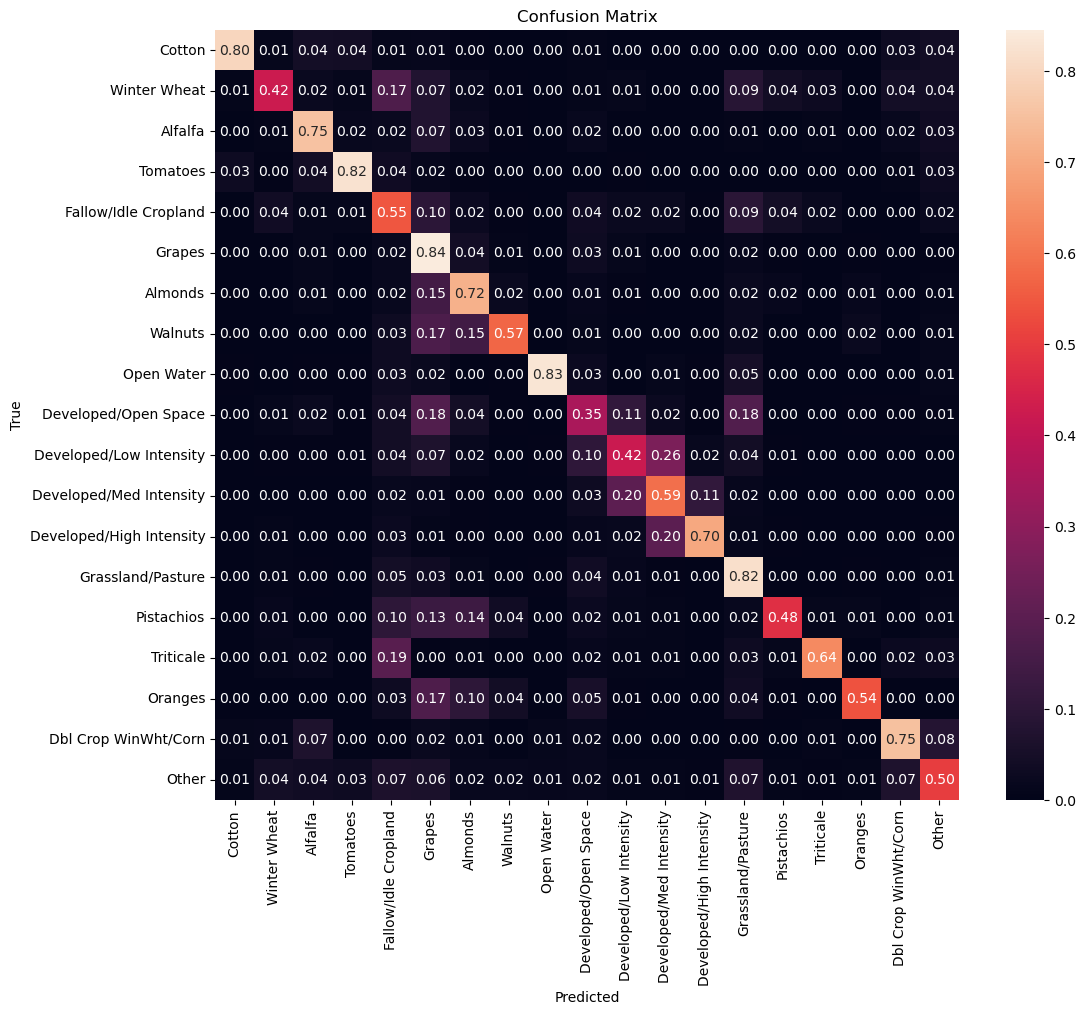

Test accuracy: 0.710


In [1]:
%run test.py --model_path weights\resnet18_20e_0.0001lr_sw.pth --confusion_matrix

Using device: cuda
Loading test dataset...
Test dataset successfully loaded
Loading model...


C:\Users\Sebastian\Documents\Land Cover Classification\test.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.model_path, map_location=device

Model loaded from weights\resnet18_20e_0.0001lr.pth
Starting testing...
Test Accuracy: 0.705

Classification Report:
                          precision    recall  f1-score   support

                  Cotton       0.82      0.76      0.79       276
            Winter Wheat       0.37      0.37      0.37       349
                 Alfalfa       0.74      0.74      0.74      1228
                Tomatoes       0.77      0.82      0.79       445
    Fallow/Idle Cropland       0.50      0.59      0.54      1891
                  Grapes       0.79      0.85      0.82      9049
                 Almonds       0.82      0.71      0.76      4980
                 Walnuts       0.47      0.53      0.50       331
              Open Water       0.82      0.79      0.80       233
    Developed/Open Space       0.38      0.39      0.38      1524
 Developed/Low Intensity       0.39      0.35      0.37      1037
 Developed/Med Intensity       0.66      0.66      0.66      1696
Developed/High Intensity

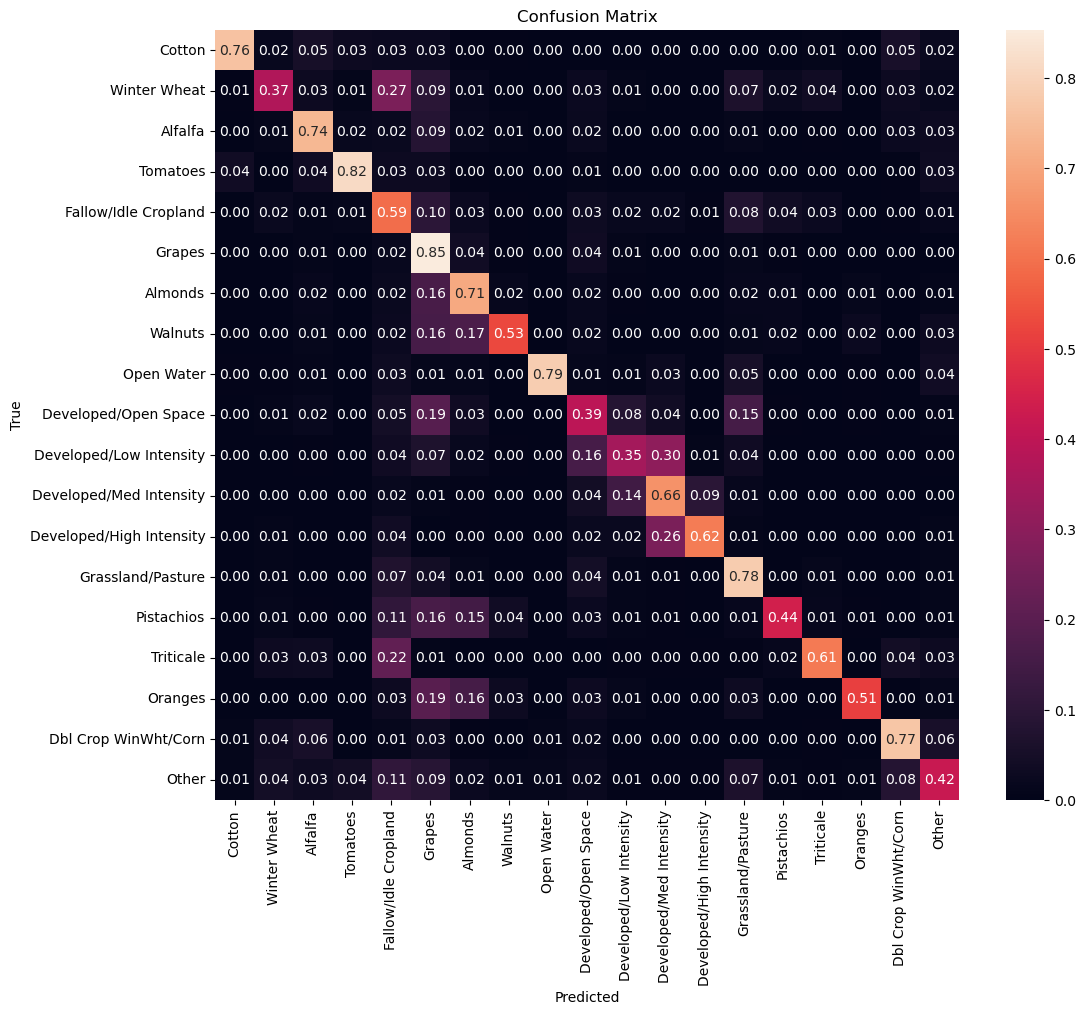

Test accuracy: 0.705


In [2]:
%run test.py --model_path weights\resnet18_20e_0.0001lr.pth --confusion_matrix

Using device: cuda
Loading test dataset...
Test dataset successfully loaded
Loading model...


C:\Users\Sebastian\Documents\Land Cover Classification\test.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.model_path, map_location=device

Model loaded from weights\resnet18_10e_0.001lr_bw.pth
Starting testing...
Test Accuracy: 0.617

Classification Report:
                          precision    recall  f1-score   support

                  Cotton       0.62      0.73      0.67       276
            Winter Wheat       0.16      0.41      0.23       349
                 Alfalfa       0.56      0.72      0.63      1228
                Tomatoes       0.65      0.82      0.73       445
    Fallow/Idle Cropland       0.38      0.51      0.44      1891
                  Grapes       0.88      0.64      0.74      9049
                 Almonds       0.85      0.58      0.69      4980
                 Walnuts       0.23      0.63      0.34       331
              Open Water       0.55      0.83      0.66       233
    Developed/Open Space       0.33      0.49      0.39      1524
 Developed/Low Intensity       0.43      0.35      0.39      1037
 Developed/Med Intensity       0.72      0.61      0.66      1696
Developed/High Intensi

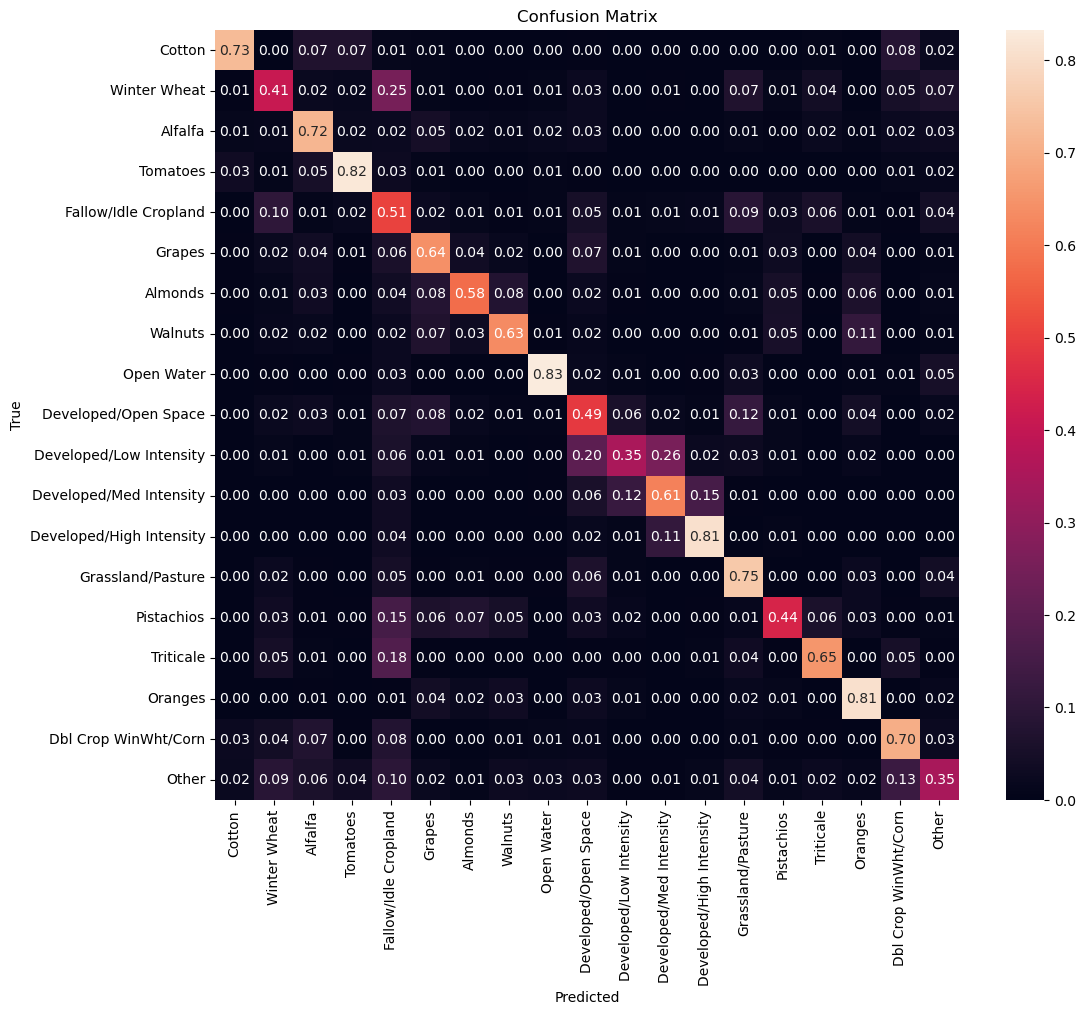

Test accuracy: 0.617


In [4]:
%run test.py --model_path weights\resnet18_10e_0.001lr_bw.pth --confusion_matrix

In [5]:
%run test.py --model_path weights\best_model.pth --confusion_matrix

Using device: cuda
Loading test dataset...
Test dataset successfully loaded
Loading model...


C:\Users\Sebastian\Documents\Land Cover Classification\test.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.model_path, map_location=device

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([61, 512]) from checkpoint, the shape in current model is torch.Size([19, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([61]) from checkpoint, the shape in current model is torch.Size([19]).